In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Create a synthetic dataset with two clusters and different orientations
data, _ = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)
angles = np.random.rand(300) * 2 * np.pi
data_rotated = np.column_stack([data[:, 0] * np.cos(angles) - data[:, 1] * np.sin(angles),
                                data[:, 0] * np.sin(angles) + data[:, 1] * np.cos(angles)])

# Standardize the data
scaler = StandardScaler()
data_rotated_scaled = scaler.fit_transform(data_rotated)

In [ ]:
# Apply K-means with K=2
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_rotated_scaled)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Apply Gaussian Mixture Model with K=2
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_rotated_scaled)
labels_gmm = gmm.predict(data_rotated_scaled)


In [ ]:

# Calculate clustering metrics
silhouette_kmeans = silhouette_score(data_rotated_scaled, labels_kmeans)
silhouette_gmm = silhouette_score(data_rotated_scaled, labels_gmm)

ch_score_kmeans = calinski_harabasz_score(data_rotated_scaled, labels_kmeans)
ch_score_gmm = calinski_harabasz_score(data_rotated_scaled, labels_gmm)

db_score_kmeans = davies_bouldin_score(data_rotated_scaled, labels_kmeans)
db_score_gmm = davies_bouldin_score(data_rotated_scaled, labels_gmm)


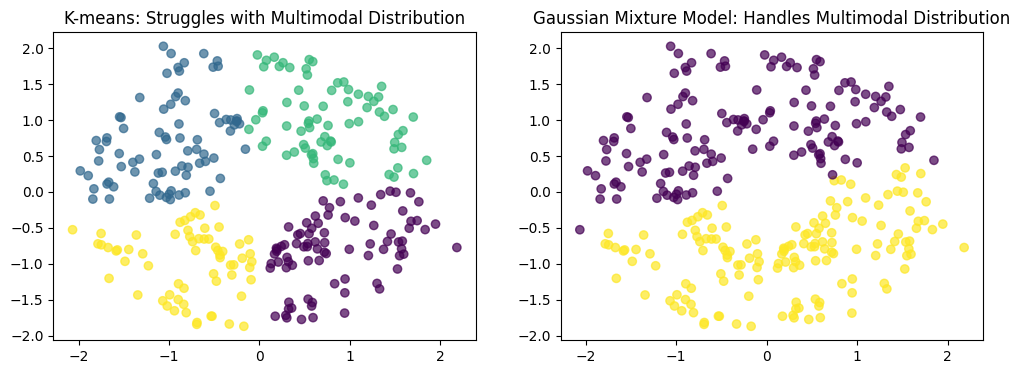

In [ ]:
# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(data_rotated_scaled[:, 0], data_rotated_scaled[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.title('K-means: Struggles with Multimodal Distribution')

plt.subplot(1, 2, 2)
plt.scatter(data_rotated_scaled[:, 0], data_rotated_scaled[:, 1], c=labels_gmm, cmap='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model: Handles Multimodal Distribution')

plt.show()


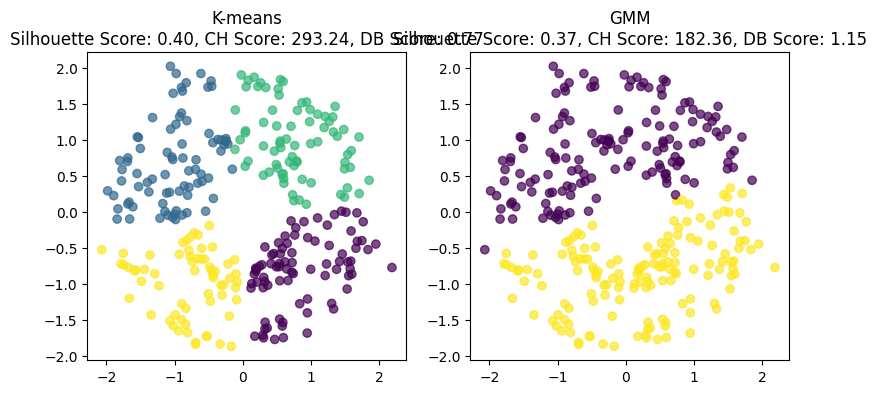

In [ ]:

# Plot the results
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(data_rotated_scaled[:, 0], data_rotated_scaled[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.title(f'K-means\nSilhouette Score: {silhouette_kmeans:.2f}, CH Score: {ch_score_kmeans:.2f}, DB Score: {db_score_kmeans:.2f}')


plt.subplot(1, 3, 2)
plt.scatter(data_rotated_scaled[:, 0], data_rotated_scaled[:, 1], c=labels_gmm, cmap='viridis', alpha=0.7)
plt.title(f'GMM\nSilhouette Score: {silhouette_gmm:.2f}, CH Score: {ch_score_gmm:.2f}, DB Score: {db_score_gmm:.2f}')

plt.show()
